Reference: https://www.kaggle.com/datasets/dgawlik/nyse/code?datasetId=854&searchQuery=arima

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [49]:
df = pd.read_csv('../DATA/NFLX_daily.csv', index_col=0)
df.sort_values(by=['timestamp'], ascending=[1])
g = df.groupby(df['timestamp'])
g.count().sort_values(by=['volume'], ascending=[1])

,open,high,low,close,volume
timestamp,,,,,
2002-05-23,1,1,1,1,1
2015-08-24,1,1,1,1,1
2015-08-21,1,1,1,1,1
2015-08-20,1,1,1,1,1
2015-08-19,1,1,1,1,1
...,...,...,...,...,...
2008-12-31,1,1,1,1,1
2008-12-30,1,1,1,1,1
2008-12-29,1,1,1,1,1


In [54]:
df = df.sort_values(by=['timestamp'], ascending=[1])
df

,timestamp,open,high,low,close,volume
5000,2002-05-23,16.19,17.40,16.040,16.75,7485000
4999,2002-05-24,17.00,17.15,16.760,16.94,793200
4998,2002-05-28,16.99,17.25,16.200,16.20,472100
4997,2002-05-29,16.30,16.30,15.200,15.45,482700
4996,2002-05-30,15.51,15.51,15.000,15.00,725300
...,...,...,...,...,...,...
4,2022-03-28,375.23,380.28,366.730,378.51,4323435
3,2022-03-29,384.39,396.50,380.330,391.82,5880723
2,2022-03-30,389.55,392.70,378.625,381.47,4023301
1,2022-03-31,383.59,384.00,373.610,374.59,4134720


In [55]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df

,timestamp,open,high,low,close,volume
5000,2002-05-23,16.19,17.40,16.040,16.75,7485000
4999,2002-05-24,17.00,17.15,16.760,16.94,793200
4998,2002-05-28,16.99,17.25,16.200,16.20,472100
4997,2002-05-29,16.30,16.30,15.200,15.45,482700
4996,2002-05-30,15.51,15.51,15.000,15.00,725300
...,...,...,...,...,...,...
4,2022-03-28,375.23,380.28,366.730,378.51,4323435
3,2022-03-29,384.39,396.50,380.330,391.82,5880723
2,2022-03-30,389.55,392.70,378.625,381.47,4023301
1,2022-03-31,383.59,384.00,373.610,374.59,4134720


In [235]:
df = df.drop(['open','high','low','volume'], axis=1)
df

,timestamp,close
5000,2002-05-23,16.75
4999,2002-05-24,16.94
4998,2002-05-28,16.20
4997,2002-05-29,15.45
4996,2002-05-30,15.00
...,...,...
4,2022-03-28,378.51
3,2022-03-29,391.82
2,2022-03-30,381.47
1,2022-03-31,374.59


In [238]:
df_close = df[(df['timestamp'] > '2010-01-01') & (df['timestamp'] < '2021-12-31')]
df_close

,timestamp,close
3083,2010-01-04,53.480
3082,2010-01-05,51.510
3081,2010-01-06,53.320
3080,2010-01-07,52.400
3079,2010-01-08,53.300
...,...,...
825,2018-12-21,246.390
824,2018-12-24,233.880
823,2018-12-26,253.670
822,2018-12-27,255.565


In [239]:
# df_close = df_training.drop(['open','high','low','volume'], axis=1)
df_close.index = df_training['timestamp']
# df_close = df_close['close']
# df_close.index = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
df_close = df_close.drop(['timestamp'], axis=1)
df_close

,close
timestamp,
2010-01-04,53.480
2010-01-05,51.510
2010-01-06,53.320
2010-01-07,52.400
2010-01-08,53.300
...,...
2018-12-21,246.390
2018-12-24,233.880
2018-12-26,253.670


In [240]:
df_test = df[df['timestamp'] > '2022-01-01']
df_test

,timestamp,close
819,2019-01-02,267.66
818,2019-01-03,271.20
817,2019-01-04,297.57
816,2019-01-07,315.34
815,2019-01-08,320.27
...,...,...
4,2022-03-28,378.51
3,2022-03-29,391.82
2,2022-03-30,381.47
1,2022-03-31,374.59


In [78]:
type(df_close)

pandas.core.frame.DataFrame

In [79]:
def check_stationarity(ts_data):
    
    # Rolling statistics
    roll_mean = ts_data.rolling(30).mean()
    roll_std = ts_data.rolling(5).std()
    
    # Plot rolling statistics
    fig = plt.figure(figsize=(20,10))
    plt.subplot(211)
    plt.plot(ts_data, color='black', label='Original Data')
    plt.plot(roll_mean, color='red', label='Rolling Mean(30 days)')
    plt.legend()
    plt.subplot(212)
    plt.plot(roll_std, color='green', label='Rolling Std Dev(5 days)')
    plt.legend()
    
    # Dickey-Fuller test
    print('Dickey-Fuller test results\n')
    df_test = adfuller(ts_data, regresults=False)
    test_result = pd.Series(df_test[0:4], index=['Test Statistic','p-value','# of lags','# of obs'])
    print(test_result)
    for k,v in df_test[4].items():
        print('Critical value at %s: %1.5f' %(k,v))

Dickey-Fuller test results

Test Statistic      -2.666826
p-value              0.079957
# of lags            0.000000
# of obs          2262.000000
dtype: float64
Critical value at 1%: -3.43324
Critical value at 5%: -2.86282
Critical value at 10%: -2.56745


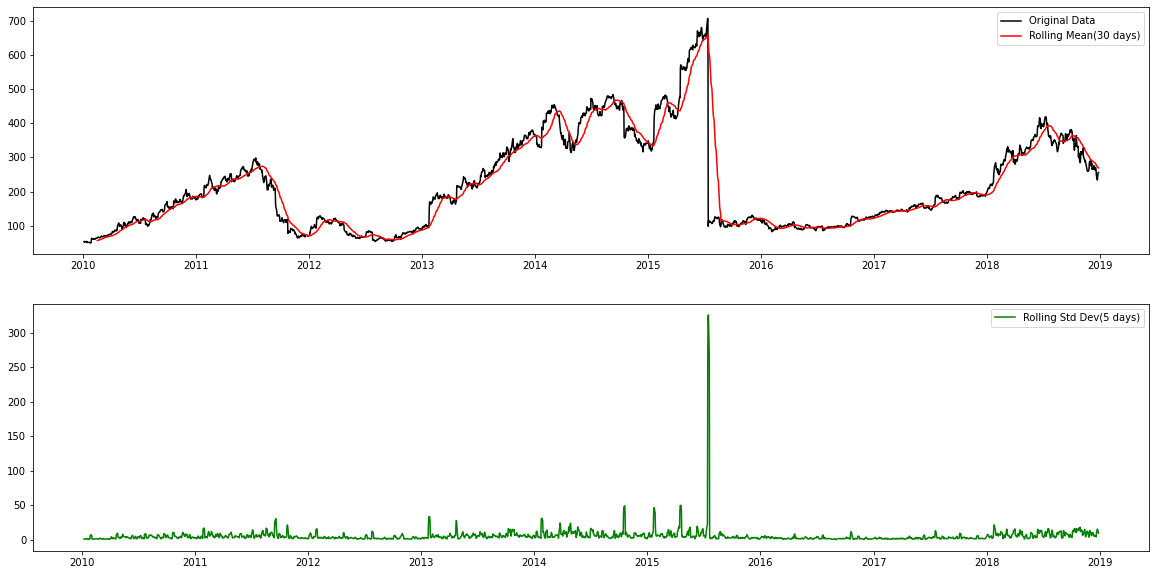

In [80]:
check_stationarity(df_close)

In [69]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

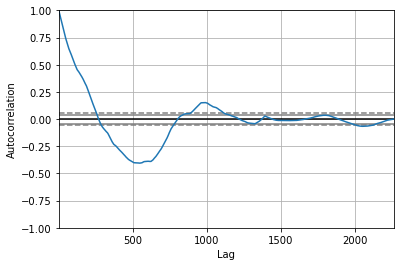

In [81]:
autocorrelation_plot(df_close)


Dickey-Fuller test results

Test Statistic     -47.627836
p-value              0.000000
# of lags            0.000000
# of obs          2261.000000
dtype: float64
Critical value at 1%: -3.43325
Critical value at 5%: -2.86282
Critical value at 10%: -2.56745


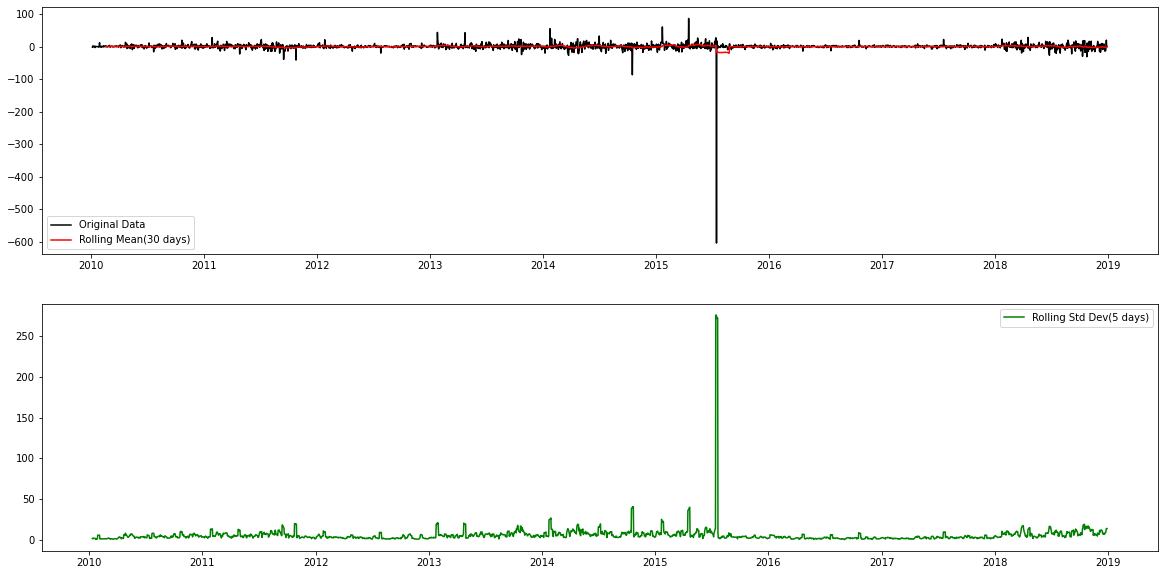

In [255]:
diff = df_close.diff().dropna()
check_stationarity(diff)

In [257]:
# from pmdarima.arima.utils import ndiffs

ModuleNotFoundError: No module named 'pmdarima'

In [82]:
df_final_log = np.log(df_close)
df_final_log.head()

,close
timestamp,
2010-01-04,3.979308
2010-01-05,3.941776
2010-01-06,3.976311
2010-01-07,3.958907
2010-01-08,3.975936


Dickey-Fuller test results

Test Statistic      -2.434369
p-value              0.132270
# of lags            0.000000
# of obs          2262.000000
dtype: float64
Critical value at 1%: -3.43324
Critical value at 5%: -2.86282
Critical value at 10%: -2.56745


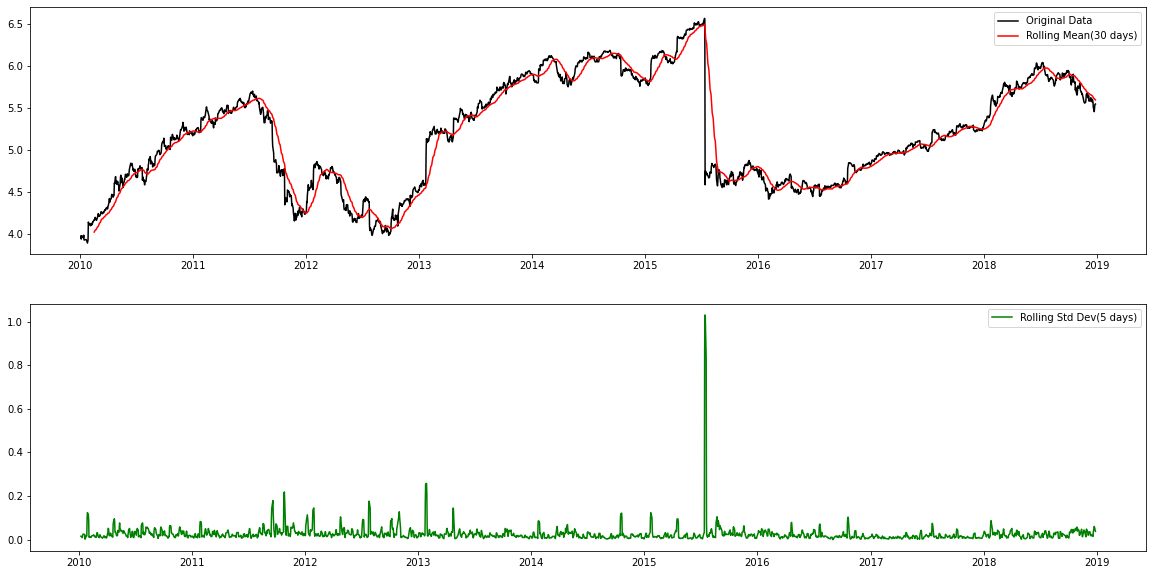

In [83]:
df_final_log.dropna(inplace=True)
check_stationarity(df_final_log)

In [266]:
from statsmodels.graphics.tsaplots import plot_acf

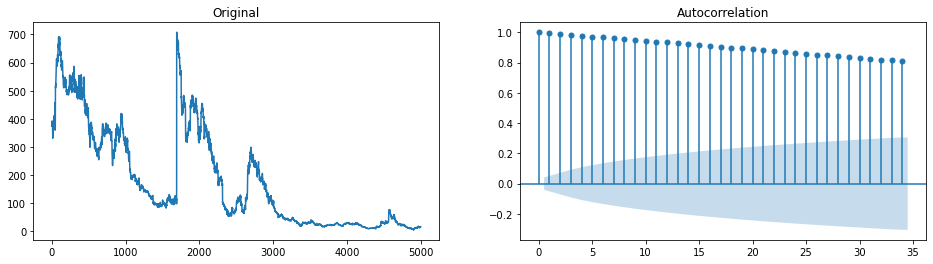

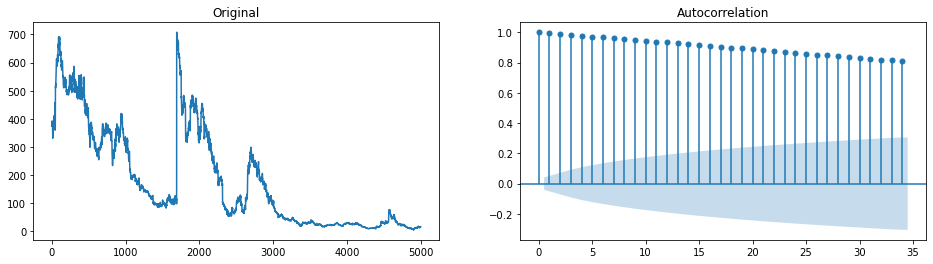

In [268]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df.close)
ax1.set_title("Original")
# add ; at the end of the plot function so that the plot is not duplicated
plot_acf(df_close, ax=ax2)

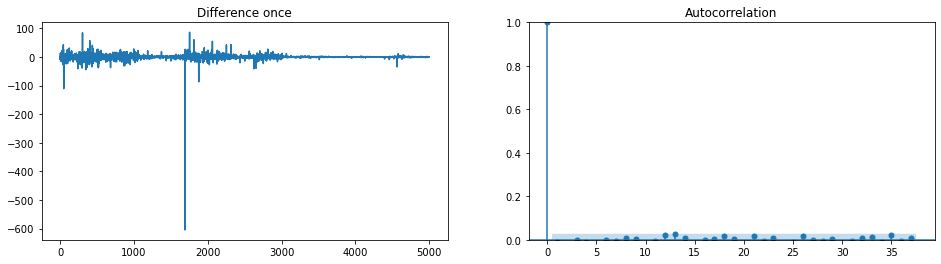

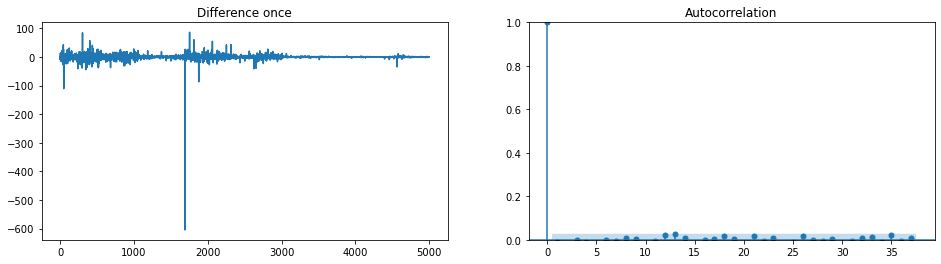

In [269]:
diff = df.close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2)

In [326]:
model = sm.tsa.arima.ARIMA(df_close, order=(6,1,3))

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [327]:
result = model.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [328]:
result.conf_int()

,0,1
ar.L1,-67.737429,67.735290
ar.L2,-21.617152,21.592721
ar.L3,-25.784694,25.787255
ar.L4,-0.669132,0.637679
ar.L5,-1.787166,1.787659
ar.L6,-0.342920,0.355847
ma.L1,-67.737034,67.734832
ma.L2,-21.635006,21.599968
ma.L3,-23.900979,23.894975
sigma2,208.521568,211.409449


In [329]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 2263
Model:                 ARIMA(6, 1, 3)   Log Likelihood               -9257.113
Date:                Sun, 03 Apr 2022   AIC                          18534.226
Time:                        20:53:52   BIC                          18591.466
Sample:                             0   HQIC                         18555.113
                               - 2263                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0011     34.560  -3.09e-05      1.000     -67.737      67.735
ar.L2         -0.0122     11.023     -0.001      0.999     -21.617      21.593
ar.L3          0.0013     13.156   9.73e-05      1.000     -25.785      25.787
ar.L4         -0.0157      0.333     -0.047      0.962      -0.669       0.638
ar.L5          0.0002      0.912      0.000      1.000      -1.787       1.788
ar.L6          0.0065      0.178      0.036      0.971      -0.343       0.356
ma.L1         -0.0011     34.560  -3.19e-05      1.000     -67.737      67.735
ma.L2         -0.0175     11.030     -0.002      0.999     -21.635      21.600
ma.L3         -0.0030     12.193     -0.000      1.000     -23.901      23.895
sigma2       209.9655      0.737    285.001      0.000     208.522     211.409
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         166762834.56
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                           -31.86
Prob(H) (two-sided):                  0.00   Kurtosis:                      1331.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [330]:
step = 30
pred = result.forecast(step)
forecast = result.get_forecast(step)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha=0.05)
yhat_conf_int

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,lower close,upper close
2263,227.751404,284.551892
2264,215.601615,295.842512
2265,206.976637,304.251118
2266,199.892341,311.586877
2267,193.715285,317.787704
2268,188.095343,323.424475
2269,182.827369,328.696580
2270,177.908663,333.605546
2271,173.286578,338.225901
2272,168.911747,342.602226


In [331]:
lower = pd.Series(yhat_conf_int['lower close'])
upper = pd.Series(yhat_conf_int['upper close'])
yhat_conf_int = pd.Series(pd.Series)

In [332]:
df_test[:step]
df_test_step = df_test[:step]
index = range(2263,2263+step)
df_test_step.index = index
df_test_step = df_test_step.drop(['timestamp'], axis=1)
df_test_step

,close
2263,267.66
2264,271.20
2265,297.57
2266,315.34
2267,320.27
2268,319.96
2269,324.66
2270,337.59
2271,332.94
2272,354.64


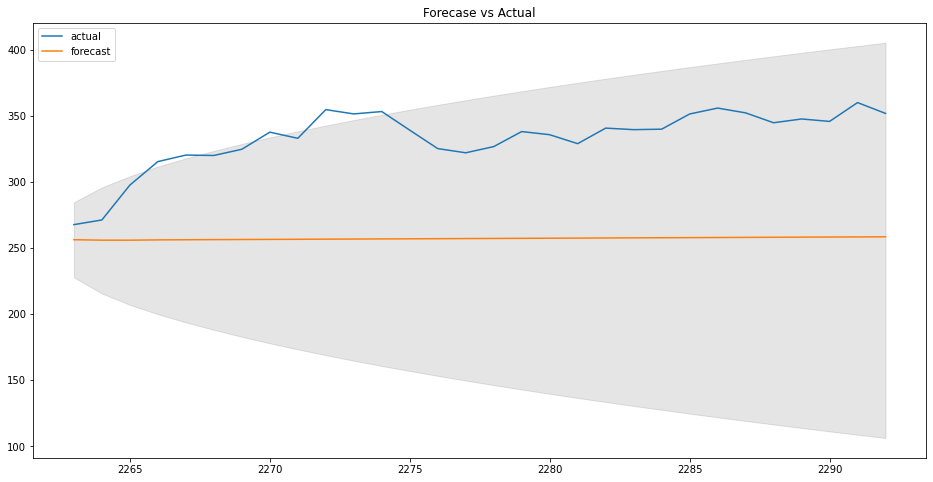

In [333]:
plt.figure(figsize=(16,8))
plt.plot(df_test_step[:step], label='actual')
plt.plot(fc, label='forecast')
plt.fill_between(lower.index, lower, upper, color='k', alpha=0.1)
plt.title('Forecase vs Actual')
plt.legend(loc='upper left')

In [317]:
df_test_step.index

RangeIndex(start=2263, stop=2293, step=1)

In [348]:
last = round(len(df_close)*0.2)
pred = result.predict(start=2262-last, end=2262)
df_last = df_close[len(df_close)-last:]
df_last

,close
timestamp,
2017-03-14,143.190
2017-03-15,145.250
2017-03-16,144.390
2017-03-17,145.110
2017-03-20,145.830
...,...
2018-12-21,246.390
2018-12-24,233.880
2018-12-26,253.670


In [349]:
pd.Series(pred)

timestamp
2017-03-13    140.891307
2017-03-14    143.538169
2017-03-15    143.104970
2017-03-16    145.238259
2017-03-17    144.289819
                 ...    
2018-12-21    260.773769
2018-12-24    246.423825
2018-12-26    234.384595
2018-12-27    254.174114
2018-12-28    255.198143
Name: predicted_mean, Length: 454, dtype: float64

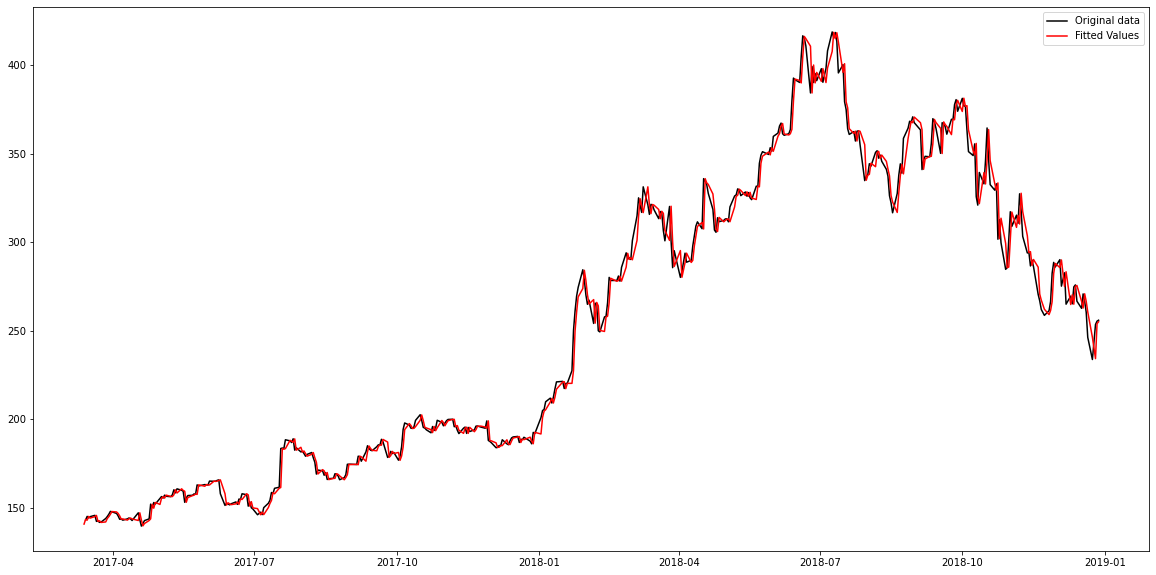

In [350]:
plt.figure(figsize=(20,10))
plt.plot(df_last, color='black', label='Original data')
plt.plot(pred, color='red', label='Fitted Values')
plt.legend()